# Compiler Experiments

In this nb we run some tests on our implementation of the Quantum Shannon Decomposition by Shende et al. [1]. In particular, we evaluate it by

- Compiling Haar Random unitaries for n \leq 10
- Generating our time evolution circuits, and contrasting their 2-qubit gate count with the result of their compilation 

[1] https://arxiv.org/abs/quant-ph/0406176

In [1]:
from package.helpers import * # Importing python libraries, accessing the IBMQ backends, and simple linear algebra tools
from package.circuits import * # Generating quantum circuits for Hamiltonian Simulation
from package.compiler import * # A Quantum compiler and geometric parsing 
from package.testing import * # Testing scripts

## Haar Random Unitaries

In [3]:
# careful, this takes some time to run!
verbose = True
n = 15

# initialize gate count
entangling_gates = []

for i in range(2, n):
    
    dim = 2**i
    U = unitary_group.rvs(dim) # generate the random unitary as a 2D numpy array
    qc = gen_qsd(U).decompose() # compile x into a circuit, the gen_qsd(Unitary) function
    
    if verbose:
        print("Number of Qubits: ", i, ", Number of 2-Qubit gates:", qc.count_ops()['cx'])
    
    entangling_gates.append(qc.count_ops()['cx'])

Number of Qubits:  2 , Number of 2-Qubit gates: 3
Number of Qubits:  3 , Number of 2-Qubit gates: 24
Number of Qubits:  4 , Number of 2-Qubit gates: 120
Number of Qubits:  5 , Number of 2-Qubit gates: 528
Number of Qubits:  6 , Number of 2-Qubit gates: 2208
Number of Qubits:  7 , Number of 2-Qubit gates: 9024
Number of Qubits:  8 , Number of 2-Qubit gates: 36480
Number of Qubits:  9 , Number of 2-Qubit gates: 146688
Number of Qubits:  10 , Number of 2-Qubit gates: 588288


KeyboardInterrupt: 

In [4]:
entangling_gates

[3, 24, 120, 528, 2208, 9024, 36480, 146688, 588288]

In [9]:
def ub(n):
    return 9/16 * 4**n - 3/2 * 2**n
Ub = [ub(i) for i in range(2, 11) ]

In [8]:
def lb(n):
    return ( 4**n - 3*n - 1)/4
Lb = [lb(i) for i in range(2, 11) ]

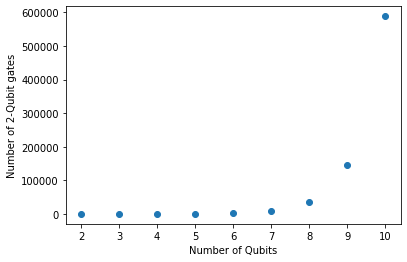

In [6]:
plot_results(range(2, 11), entangling_gates, x_axis_name = "Number of Qubits", y_axis_name = "Number of 2-Qubit gates")

## Compiling Our Circuits

In [2]:
entangling_gates

NameError: name 'entangling_gates' is not defined

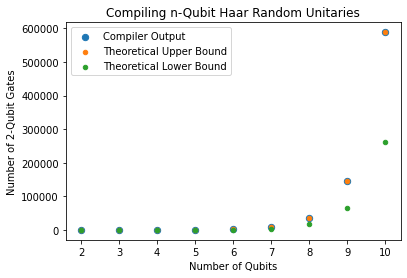

In [30]:
plt.scatter(range(2, 11), entangling_gates,  label = "Compiler Output", s=40)
plt.scatter(range(2, 11), Ub, label = "Theoretical Upper Bound", s=20)
plt.scatter(range(2, 11), Lb, label = "Theoretical Lower Bound", s=20)


plt.legend(loc='bottom right')

plt.title("Compiling n-Qubit Haar Random Unitaries")
plt.xlabel("Number of Qubits")
plt.ylabel("Number of 2-Qubit Gates")

plt.show()